In [1]:
# Heleper Functions
# Adapted from http://parneetk.github.io/blog/cnn-cifar10/
import matplotlib.pyplot as plt
import numpy as np

def show_image_examples(class_names, features, labels):
    num_classes = len(class_names)
    fig = plt.figure(figsize=(8, 3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(labels[:] == i)[0]
        features_idx = features[idx, ::]
        img_num = np.random.randint(features_idx.shape[0])
        im = features_idx[img_num, ::]
        ax.set_title(class_names[i])
        plt.imshow(im)
    plt.show()

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['sparse_categorical_accuracy'])+1), 
                model_history.history['sparse_categorical_accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_sparse_categorical_accuracy'])+1), 
                model_history.history['val_sparse_categorical_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['sparse_categorical_accuracy'])+1),
                      len(model_history.history['sparse_categorical_accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),
                model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1), 
                model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),
                      len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict_ = pickle.load(fo, encoding='bytes')
    print(dict_.keys())
    features = dict_[b'data'].reshape((len(dict_[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = np.array(dict_[b'labels'])
    return features, labels
x_train=np.empty((0,32,32,3),dtype='uint8')
y_train=np.empty((0),dtype='uint8')
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(1,6):
    file='E:\ML_IP\image_processing/cifar-10-batches-py/data_batch_%d'%i
    features,labels=unpickle(file)
    x_train=np.concatenate((x_train,features),axis=0)
    y_train=np.concatenate((y_train,labels),axis=0)
file='E:\ML_IP\image_processing/cifar-10-batches-py/test_batch'
x_test,y_test=unpickle(file)

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


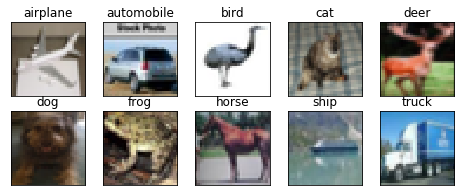

In [5]:
show_image_examples(classes, x_train, y_train)


1.13.1
(50000, 32, 32, 3) (50000,)


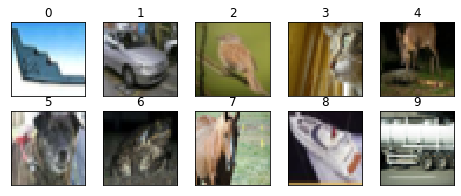

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 91s 2ms/sample - loss: 2.3031 - sparse_categorical_accuracy: 0.0975 - val_loss: 2.3031 - val_sparse_categorical_accuracy: 0.0958
Epoch 2/20
45000/45000 [==============================] - 78s 2ms/sample - loss: 2.3030 - sparse_categorical_accuracy: 0.1000 - val_loss: 2.3033 - val_sparse_categorical_accuracy: 0.0950
Epoch 3/20
45000/45000 [==============================] - 84s 2ms/sample - loss: 2.3030 - sparse_categorical_accuracy: 0.0994 - val_loss: 2.3030 - val_sparse_categorical_accuracy: 0.0970
Epoch 4/20
45000/45000 [==============================] - 84s 2ms/sample - loss: 2.3030 - sparse_categorical_accuracy: 0.1001 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.1064
Epoch 5/20
45000

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,MaxPooling2D,Conv2D
from tensorflow.keras.regularizers import l1,l2

from helpers import *

print(tf.__version__)

batch_size = 50
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols, channels = 32, 32,3

# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
class_name=classes
# Showing a few examples
show_image_examples(class_names, x_train, y_train)

x_train, x_test = x_train / 255.0, x_test / 255.0

model=keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu',bias_regularizer=l1(0.01)),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu',bias_regularizer=l1(0.01)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(5,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')])


model.compile(optimizer=keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test,  y_test, verbose=2)

model.summary()

print('Test loss:', score[0])
print('Test accuracy:', score[1])
#print('\nHistory dict:', history.history)
    
plot_model_history(history)

In [ ]:
k=2343
plt.imshow(features[k])
img=np.expand_dims(features[k],axis=0)
print('true:' ,classes[labels[k]])
print('predicted :',classes[np.argmax(model.predict(img))])

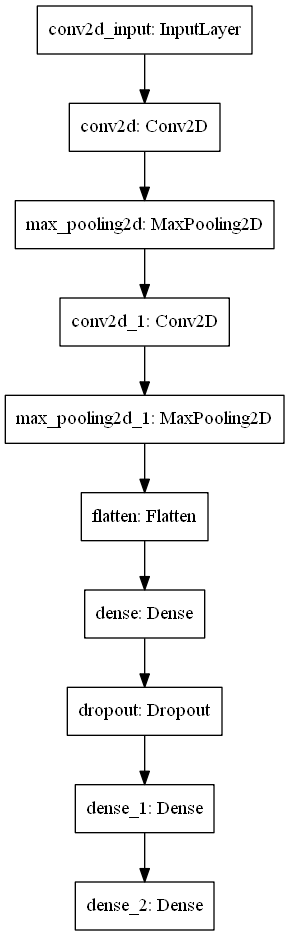

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np
np.random.seed(0)

wkdir = 'eras_to_tensorflow'
pb_filename = 'model.pb'


def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    session.run(tf.global_variables_initializer())
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph

from keras import backend as K
frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph, wkdir, pb_filename, as_text=False)


# # load & inference the model ==================

from tensorflow.python.platform import gfile
with tf.Session() as sess:
    # load model from pb file
    with gfile.FastGFile(wkdir+'/'+pb_filename,'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        sess.graph.as_default()
        g_in = tf.import_graph_def(graph_def)
    # write to tensorboard (check tensorboard for each op names)
    writer = tf.summary.FileWriter(wkdir+'/log/')
    writer.add_graph(sess.graph)
    writer.flush()
    writer.close()

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 45 variables.
INFO:tensorflow:Converted 45 variables to const ops.
Instructions for updating:
Use tf.gfile.GFile.


In [13]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import tensorflow as tf
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size, encoding='utf-8')
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
    
show_graph(tf.get_default_graph().as_graph_def())